# Proyecto Jedi - Machine Learning: Sentiment Analysis

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Read data set

In [2]:
df = pd.read_csv("./DataSets/diabetes_prediction_dataset.csv")
print(list(df.columns))
# columns_name = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam_Mpx', '4G', 
#                 'internal_memory_GB', 'depth(cm)', 'weigth', 'cpu_cores', 'primary_cam_Mpx', 'px_height', 
#                 'px_width', 'ram_Mb', 'screen_h', 'screen_w', 'talk_time', '3G', 'touch_screen', 'wifi', 'price_range']
# print(columns_name)
# df.columns = columns_name
df

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [44]:
# df["bluetooth"] = df["bluetooth"].map({1: 'yes', 0: 'no'})
# df["dual_sim"] = df["dual_sim"].map({1: 'yes', 0: 'no'})
# df["4G"] = df["4G"].map({1: 'yes', 0: 'no'})
# df["3G"] = df["3G"].map({1: 'yes', 0: 'no'})
# df["touch_screen"] = df["touch_screen"].map({1: 'yes', 0: 'no'})
# df["wifi"] = df["wifi"].map({1: 'yes', 0: 'no'})
# df["price_range"] = df["price_range"].map({0: 'low cost', 1: 'medium cost', 2: 'high cost', 3: 'extreme cost'})
# df

## Data exploration

In [3]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

<Axes: xlabel='diabetes', ylabel='count'>

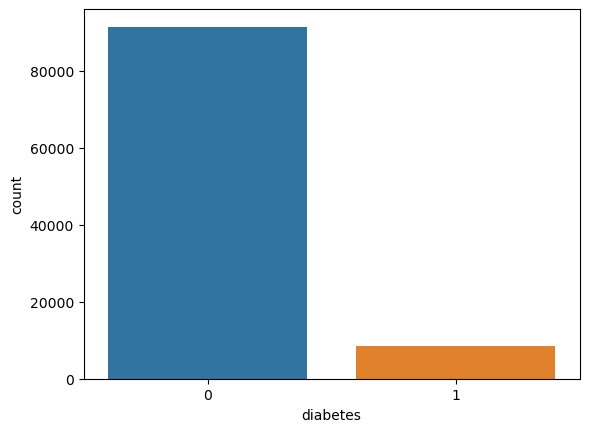

In [5]:
sns.countplot(df, x = "diabetes")

In [6]:
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,90088.0,Male,26.0,0,0,ever,27.68,6.0,140,0
1,73279.0,Female,80.0,0,0,No Info,28.29,6.5,100,0
2,99498.0,Female,25.0,0,0,never,27.06,6.6,200,0
3,69122.0,Female,50.0,0,0,former,23.13,5.7,85,0
4,95877.0,Female,68.0,1,0,not current,32.50,4.0,160,0
...,...,...,...,...,...,...,...,...,...,...
99935,NaN,Female,65.0,1,1,never,33.55,8.2,140,1
99938,NaN,Male,55.0,0,1,former,30.42,6.2,300,1
99957,NaN,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,NaN,Female,58.0,1,0,never,38.31,7.0,200,1


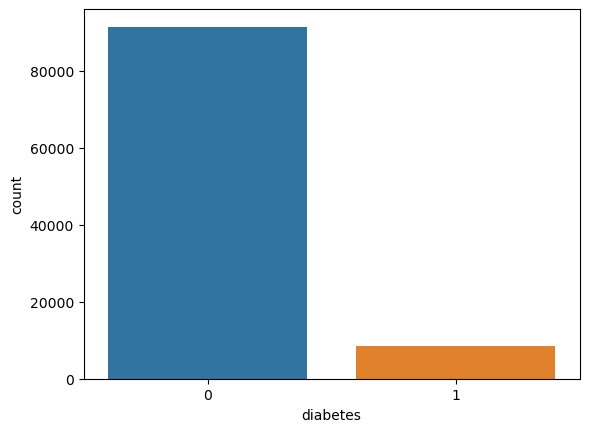

In [7]:
df_non = df[df["diabetes"] == 0].sample(10000, random_state=2).reset_index()
pd.concat([df_non, df[df["diabetes"] != 0]])
dfNew = pd.concat([df_non, df[df["diabetes"] != 0]])
sns.countplot(df, x = "diabetes")
dfNew

In [8]:
dfNew = dfNew.drop(columns=["index"], axis=1)
dfNew

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,26.0,0,0,ever,27.68,6.0,140,0
1,Female,80.0,0,0,No Info,28.29,6.5,100,0
2,Female,25.0,0,0,never,27.06,6.6,200,0
3,Female,50.0,0,0,former,23.13,5.7,85,0
4,Female,68.0,1,0,not current,32.50,4.0,160,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [66]:
# df_new.isna().sum()

In [67]:
# df_new.dtypes

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### One Hot Encoding

In [10]:
dfNew.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
print(dfNew["gender"].unique())
print(dfNew["smoking_history"].unique())

['Male' 'Female' 'Other']
['ever' 'No Info' 'never' 'former' 'not current' 'current']


In [12]:
# df = dfNew.copy()
df = dfNew.replace(["ever", "former", "not current"], "has_smoked")
df = df.replace(["No Info"], "unknown")
df = df.replace(["current"], "is_smoking")


In [13]:
df
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [14]:
df = pd.get_dummies(dfNew, drop_first = True)

In [15]:
df.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Male                      uint8
gender_Other                     uint8
smoking_history_current          uint8
smoking_history_ever             uint8
smoking_history_former           uint8
smoking_history_never            uint8
smoking_history_not current      uint8
dtype: object

<Axes: >

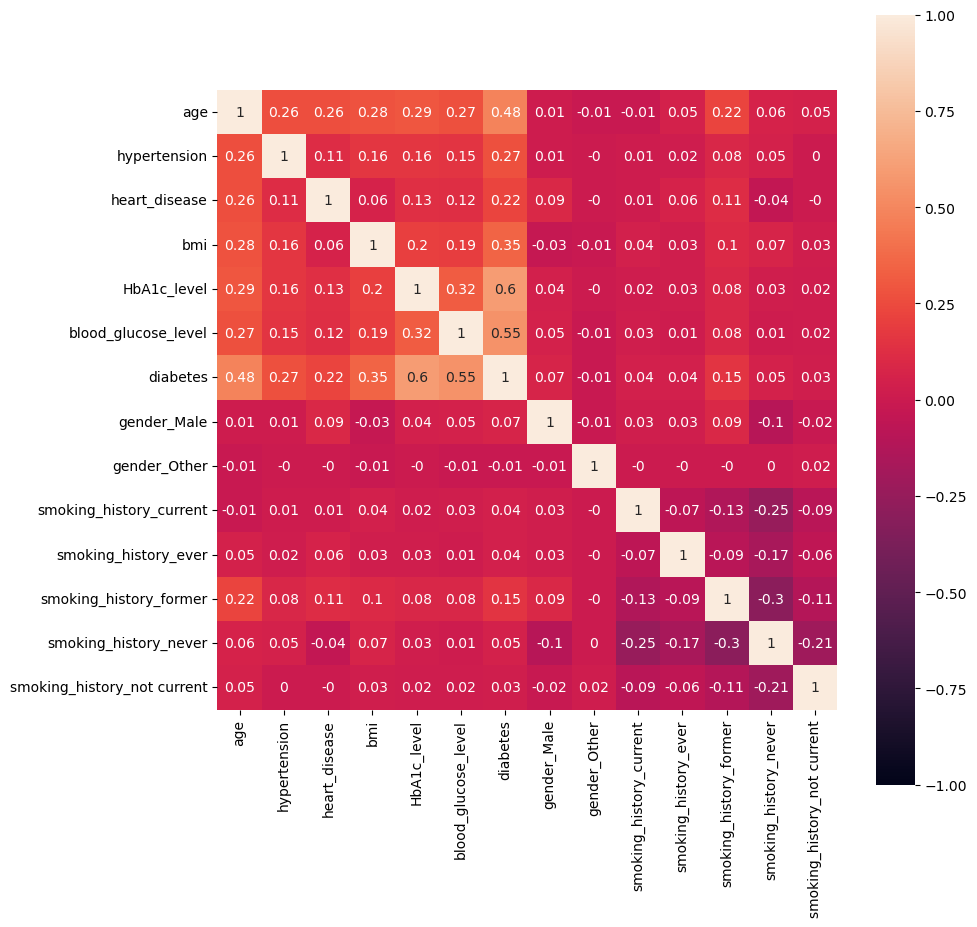

In [16]:
plt.figure(figsize=(10,10))
correlation_mat = df.select_dtypes(include=['uint8','int64', 'float64']).corr()
sns.heatmap(np.round(correlation_mat, decimals=2),square=True, vmin=-1, vmax=1, annot=True)

In [17]:
corr_target = correlation_mat.loc['diabetes',:]
corr_target[np.abs(corr_target) > 0.20]

age                    0.484116
hypertension           0.269132
heart_disease          0.224344
bmi                    0.345317
HbA1c_level            0.599569
blood_glucose_level    0.548656
diabetes               1.000000
Name: diabetes, dtype: float64

In [18]:
correlation_mat["diabetes"].sort_values(ascending=False)

diabetes                       1.000000
HbA1c_level                    0.599569
blood_glucose_level            0.548656
age                            0.484116
bmi                            0.345317
hypertension                   0.269132
heart_disease                  0.224344
smoking_history_former         0.150312
gender_Male                    0.071822
smoking_history_never          0.045679
smoking_history_ever           0.038568
smoking_history_current        0.036657
smoking_history_not current    0.031711
gender_Other                  -0.009587
Name: diabetes, dtype: float64

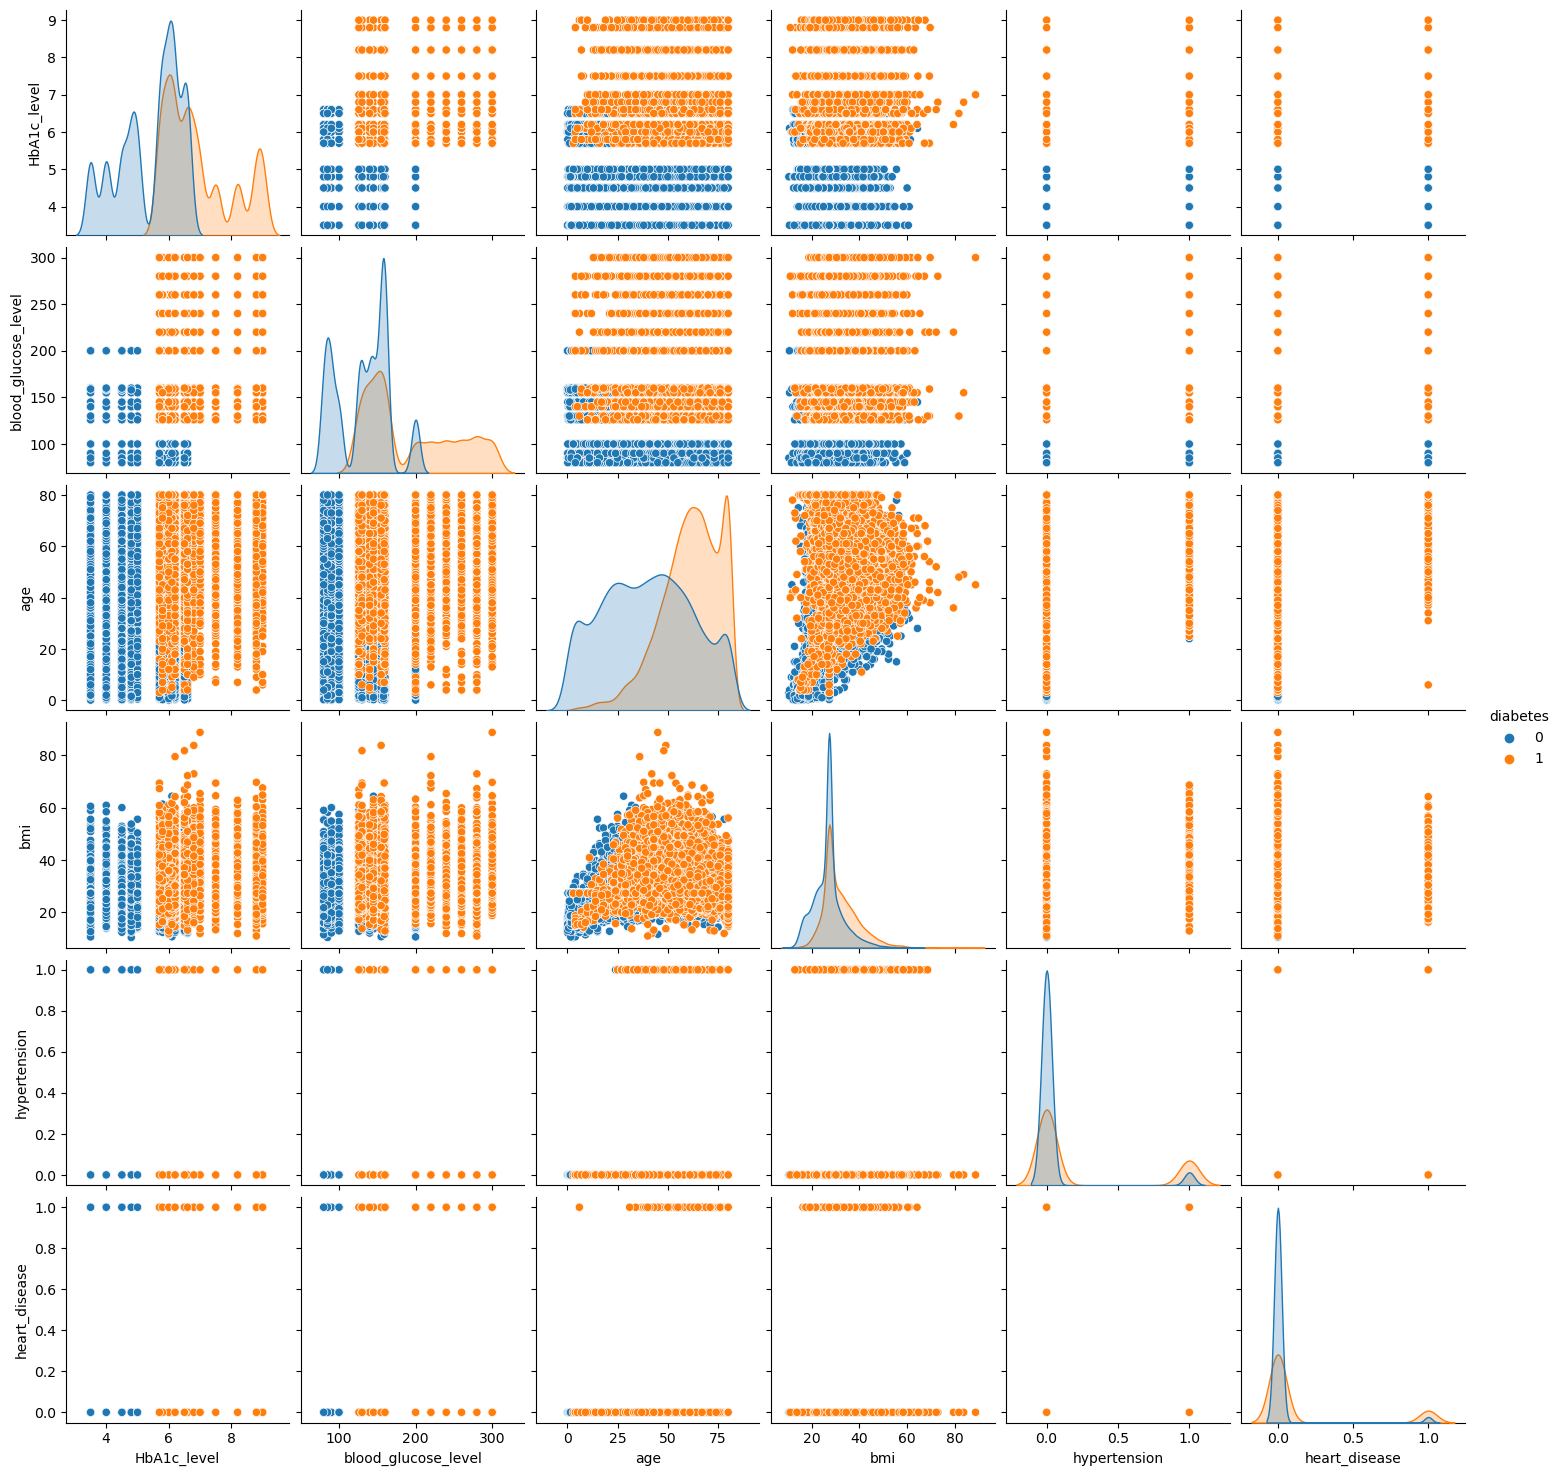

In [80]:
sns.pairplot(df[["HbA1c_level", "blood_glucose_level", "age", "bmi", "hypertension", "heart_disease", "diabetes"]], kind="scatter", hue="diabetes")

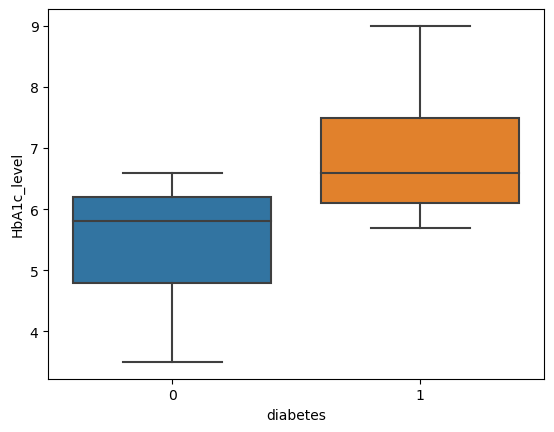

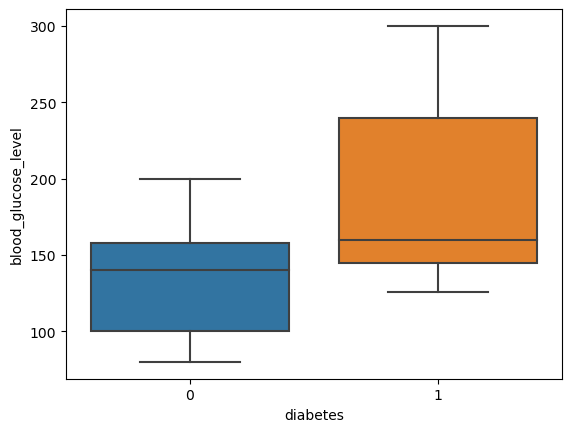

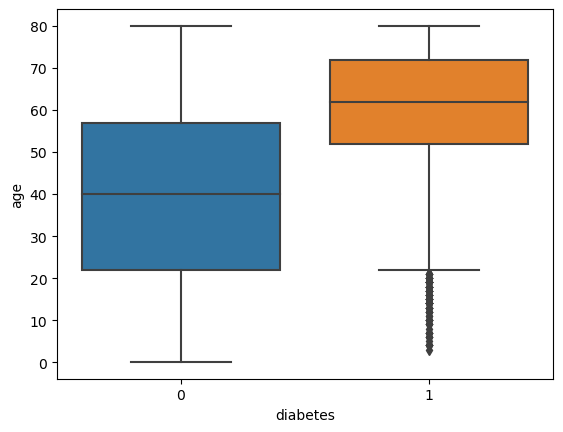

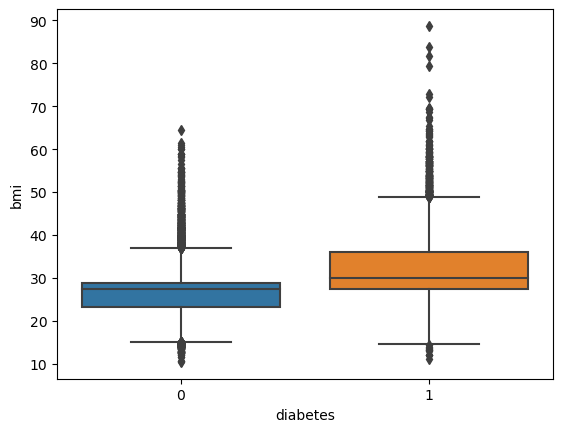

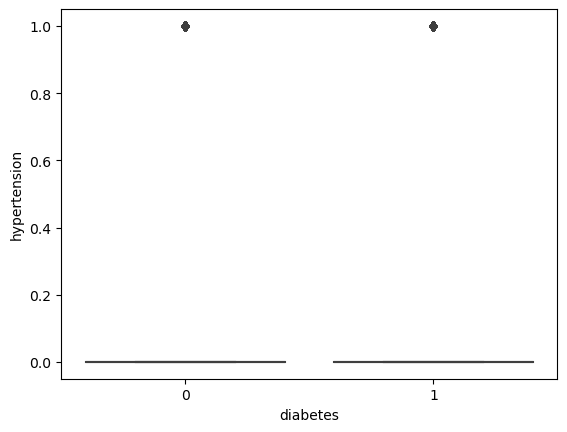

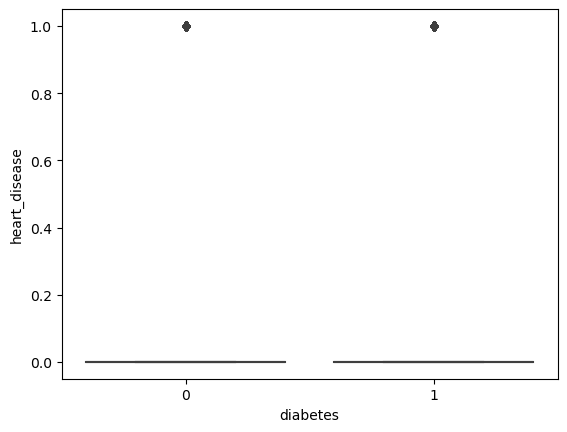

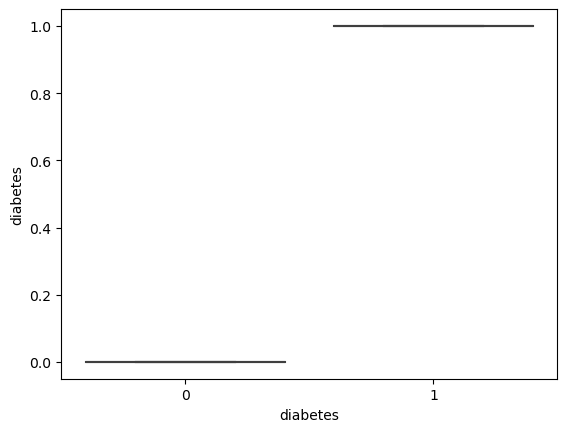

In [22]:
features = ["HbA1c_level", "blood_glucose_level", "age", "bmi", "hypertension", "heart_disease", "diabetes"]
#print(int(np.floor(len(features)/2)))

for feature in features:
    #print(feature)
    plt.figure()
    sns.boxplot(x=df["diabetes"], y=df[feature])

<Axes: xlabel='diabetes', ylabel='bmi'>

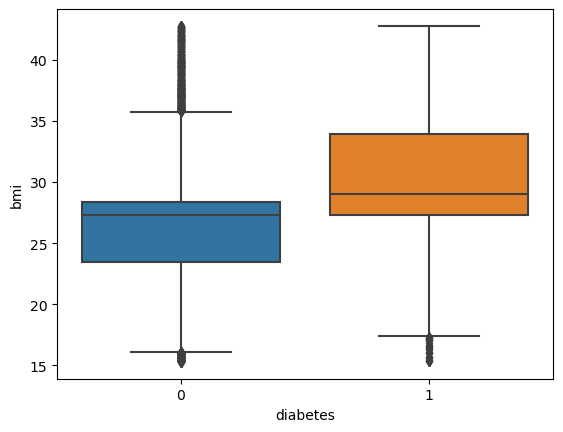

In [19]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df["bmi"] >= Q1 - 1.5 * IQR) & (df["bmi"] <= Q3 + 1.5 *IQR)
a = df.loc[filter]

sns.boxplot(x=a["diabetes"], y=a["bmi"])

## Training models

In [20]:
df.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Male                      uint8
gender_Other                     uint8
smoking_history_current          uint8
smoking_history_ever             uint8
smoking_history_former           uint8
smoking_history_never            uint8
smoking_history_not current      uint8
dtype: object

In [23]:
# Feature selection
df_model = df[features]
df_model

,HbA1c_level,blood_glucose_level,age,bmi,hypertension,heart_disease,diabetes
0,6.0,140,26.0,27.68,0,0,0
1,6.5,100,80.0,28.29,0,0,0
2,6.6,200,25.0,27.06,0,0,0
3,5.7,85,50.0,23.13,0,0,0
4,4.0,160,68.0,32.50,1,0,0
...,...,...,...,...,...,...,...
99935,8.2,140,65.0,33.55,1,1,1
99938,6.2,300,55.0,30.42,0,1,1
99957,6.5,280,61.0,34.45,0,0,1
99962,7.0,200,58.0,38.31,1,0,1


In [24]:
# Split data set
X = df_model.drop("diabetes",axis=1)
Y = df_model["diabetes"]


X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)



### Standarize data

In [25]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_train)

## Logistic regression

In [26]:
logistic = LogisticRegression()
logistic.fit(X_train_std, Y_train)

LogisticRegression()

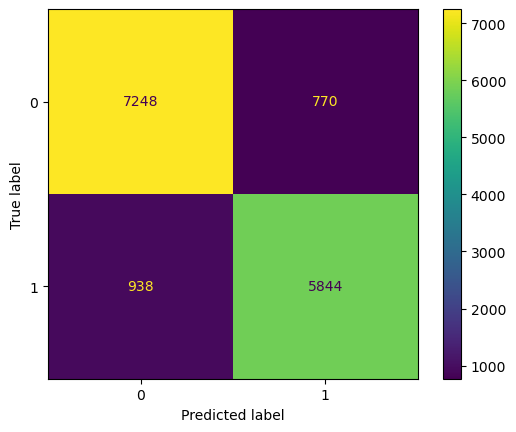

In [27]:
Y_pred = logistic.predict(X_train_std)
confusio = confusion_matrix(Y_train.values, Y_pred)
ConfusionMatrixDisplay(confusio).plot();

In [28]:
print(classification_report(Y_train.values, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8018
           1       0.88      0.86      0.87      6782

    accuracy                           0.88     14800
   macro avg       0.88      0.88      0.88     14800
weighted avg       0.88      0.88      0.88     14800



## SVM

In [29]:
svm_default = SVC()
svm_default.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

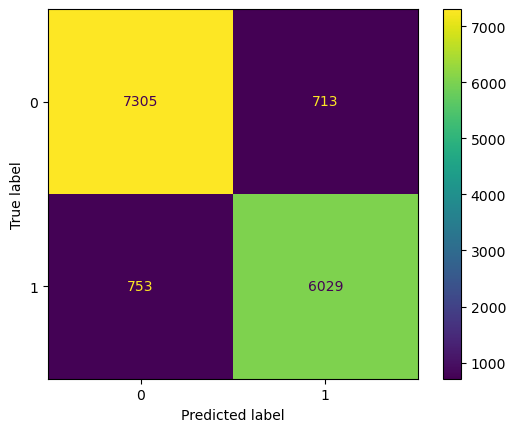

In [30]:
svm_default.fit(X_train_std, Y_train)
Y_pred = svm_default.predict(X_train_std)
confusio = confusion_matrix(Y_train.values, Y_pred)
ConfusionMatrixDisplay(confusio).plot();

In [31]:
print(classification_report(Y_train.values, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8018
           1       0.89      0.89      0.89      6782

    accuracy                           0.90     14800
   macro avg       0.90      0.90      0.90     14800
weighted avg       0.90      0.90      0.90     14800



### Svm hiparameters tuning

In [ ]:
Cs = np.logspace(-2, 1, 5)
gammas = np.logspace(-4, 3, 2)
parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas},
              #{'kernel': ['sigmoid'], 'C': Cs, 'gamma': gammas}, 
              {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(1, 4)}]

grid = GridSearchCV(SVC(),
                    param_grid = parametres,
                    cv = 5,
                    scoring = 'accuracy',
                    n_jobs=1)

grid_search = grid.fit(X_train_std, Y_train)
grid_search.cv_results_

print("Els millors hiperparàmetres són %s amb una accuracy mitjana de %0.2f"
      % (grid.best_params_, grid.best_score_))


### Random forest

In [ ]:
rf = RandomForestClassifier()

# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train_std,Y_train)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

# random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':np.random.randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':np.random.randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }